## Notebook to explore creating a pcolor plot from the average per-cell data created while gridding the drifter data

The plotting function will still need a bit of tweaking before it's ready to include with the proper gridding code

#### Suggestions from Heather: 
- If you have a dataArray already defined with lat and lon coordinate dimensions, then you just have to run: myDataArray.plot.pcolormesh(); plt.show(), and it will generate a plot for you with appropriately labelled dimensions, etc.  
- If you're using a pd.DataFrame, then you need to supply the 2D lon and lat values instead: bigLon, bigLat = meshgrid(lon, lat); plt.pcolormesh(bigLon, bigLat, myDataArray); plt.show(). It's very similar to contour in the call methods.

### I think that converting the data to an xarray dataArray will be the right solution!

In [1]:
import math
import matplotlib as mpl
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import xarray as xr

sys.path.append("/store/software/resources")

#import plotting_utils as putils
from plotting_utils import gen_color

# Values printed out data from the idealized test case. At this point in the calculations, I should
# be able to assume that I have regularly spaced x and y data, but that some of the avg values will
# be missing (ie, I only want to plot cells where data exists). Also, each x and y pair should be
# unique at this point.
x = [1.5, 1.5, 1.5, 2.5, 2.5, 2.5, 3.5, 3.5, 3.5, 3.5, 4.5, 4.5, 4.5] 
y = [2.5, 3.5, 4.5, 2.5, 3.5, 4.5, 1.5, 2.5, 3.5, 4.5, 2.5, 3.5, 4.5] 
z = [319.3, 159.2, 175.4, 209.4, 183.1, 190.9, 0.0, 51.9, 161.5, 208.9, 102.7, 88.3, 119.5] 
num_recs_random = np.random.uniform(low=1, high=5, size=(len(x),))
num_recs = [round(v) for v in num_recs_random]
midpts = [(px, py) for px, py in zip(x, y)]

# This is to replicate what I have in the gridding code:
df = pd.DataFrame({'polygon midpoints': midpts, 'sample average bearing values': z, 'num recs in cell': num_recs})

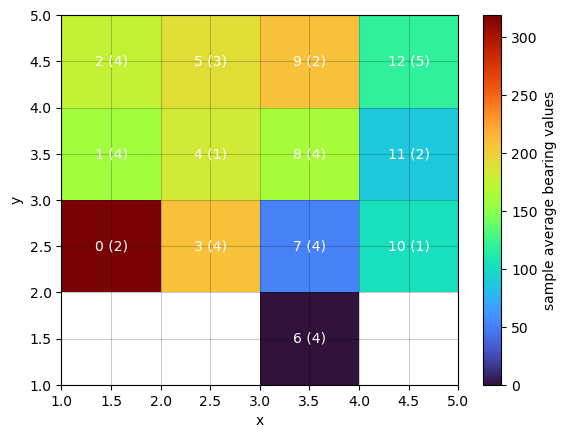

In [2]:
def check_points(ax, pmx, pmy, z, colormap='rainbow'):
    '''Useful for debugging/checking values but will not include in the final plot'''
    # check to make sure that the correct cells are being colored in:
    colorlist = gen_color(colormap, len(pmx))
    for px, py, pz, color in zip(pmx, pmy, z, colorlist):
        lab = ('(' + str(px) + ', ' + str(py) + '): ' + str(pz))
        ax.plot(px, py, 'o', color=color, markersize=12, label=lab, markeredgecolor='white')
    # put a legend to the right of the current axis by shrinking the current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=9, 
              title='Confirm correct cells\nhave been colored:\n')

def add_cell_labels(ax, avg_df, pmx, pmy):
    '''Useful for debugging/checking values but likely will not include in the final plot'''
    seg_counts = avg_df['num recs in cell'].values 
    cell_nums = avg_df.index.values
    for annx, anny, anncells, annsegs in zip(pmx, pmy, cell_nums, seg_counts):
        ax.annotate((str(anncells) + ' (' + str(annsegs) + ')'), (annx, anny), color='white', ha='center', va='center')

def plot_average_cell_values(avg_df, avg, colormap='terrain'):
    '''df will be the dataframe containing the average per-cell values (avg_vels) and avg will be
    the string representing the average value that will be plotted (ex: 'mean x velocity component', 
    'mean total bearing (degrees)', etc)'''
    
    poly_midpts = avg_df['polygon midpoints'].values
    pmx = [p[0] for p in poly_midpts]
    pmy = [p[1] for p in poly_midpts]
    z = avg_df[avg].values
    
    df = pd.DataFrame({'x': pmx, 'y': pmy, 'z': z}).set_index(["y", "x"])
    da = df.to_xarray()
    
    fig, ax = plt.subplots()

    ckwargs = {'label': avg, 'location': 'right', 'pad': 0.05}
    #ckwargs = {'label': avg, 'location': 'top', 'pad': 0.05}
    da['z'].plot.pcolormesh(cmap=colormap, cbar_kwargs=ckwargs)
    
    ax.grid(alpha=0.2, color='black')

    # These are temporary checks to make sure the data is being plotted correctly.
    # If running them, 'location' should be changed to 'top' in ckwargs above.
    #check_points(ax, pmx, pmy, z, colormap='gist_rainbow')
    add_cell_labels(ax, avg_df, pmx, pmy)
    
    plt.show()


plot_average_cell_values(df, 'sample average bearing values', colormap='turbo')

In [3]:
df

polygon midpoints  sample average bearing values  num recs in cell
0         (1.5, 2.5)                          319.3                 2
1         (1.5, 3.5)                          159.2                 4
2         (1.5, 4.5)                          175.4                 4
3         (2.5, 2.5)                          209.4                 4
4         (2.5, 3.5)                          183.1                 1
5         (2.5, 4.5)                          190.9                 3
6         (3.5, 1.5)                            0.0                 4
7         (3.5, 2.5)                           51.9                 4
8         (3.5, 3.5)                          161.5                 4
9         (3.5, 4.5)                          208.9                 2
10        (4.5, 2.5)                          102.7                 1
11        (4.5, 3.5)                           88.3                 2
12        (4.5, 4.5)                          119.5                 5